In [1]:

library("e1071")

attach(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [2]:
x <- subset(iris, select=-Species)  # -species  , -3

y <- Species


In [3]:
head(y)

[1] setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica

In [4]:
svm_model <- svm(Species ~ ., data=iris)  # Y ~ X

summary(svm_model)


Call:
svm(formula = Species ~ ., data = iris)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  51

 ( 8 22 21 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [5]:
predy <- predict(svm_model,x)
#pred

table(predy,y)

            y
predy        setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

In [6]:
# DATA cleaning
# MODEL _ SVM
# PREDICT
# TABLE - CONFUSION MATRIX 


In [7]:
# Tununig

svm_tune <- tune(svm, train.x=x, train.y=y, 
              kernel="radial", ranges=list(cost=10^(-1:2), gamma=c(0.2,.5,1,2)))

print(svm_tune)

# cost - 10**1, 10*0, 10*1
# 0.1, 1,10,100



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.2

- best performance: 0.03333333 



In [8]:
# After you find the best cost and gamma, you can create svm model again and try to run again

# svm(Species ~ ., data=iris)

svm_model_after_tune <- svm(Species ~ ., data=iris, kernel="radial", cost=1, gamma=0.5)
summary(svm_model_after_tune)


Call:
svm(formula = Species ~ ., data = iris, kernel = "radial", cost = 1, 
    gamma = 0.5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  59

 ( 11 23 25 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [9]:
pred <- predict(svm_model_after_tune,x)
table(pred,y)

            y
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

In [10]:
library(caTools)

# Spliting data into training set and test set
split = sample.split(Species, SplitRatio = .8)



In [11]:
split

[1]  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [49]  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
 [85]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[109] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[121]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[133]  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
[145]  TRUE  TRUE FALSE  TRUE  TRUE FALSE

In [12]:
training_set = subset(iris, split == TRUE)

test_set = subset(iris, split == FALSE)

nrow(training_set)

[1] 120

In [13]:

nrow(test_set)

[1] 30

In [14]:
# Scaling  -- SCALE - Use inform to students

training_set[,1:4] = scale(training_set[,1:4])

test_set[,1:4] = scale(test_set[,1:4])

#classifier1 = svm(formula = Species~., data = training_set, type = 'C-classification', kernel = 'radial')

classifier2 = svm(formula = Species~ Sepal.Width + Sepal.Length, data = training_set, type = 'C-classification',
                  kernel = 'radial')

In [15]:
classifier2


Call:
svm(formula = Species ~ Sepal.Width + Sepal.Length, data = training_set, 
    type = "C-classification", kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  70


In [16]:
test_pred2 = predict(classifier2, type = 'response', newdata = test_set[-5])

cm2 = table(test_set[,5], test_pred2)

cm2



            test_pred2
             setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          5         5
  virginica       0          4         6

In [17]:
# Confusion MAtrix

# SVM PLOT

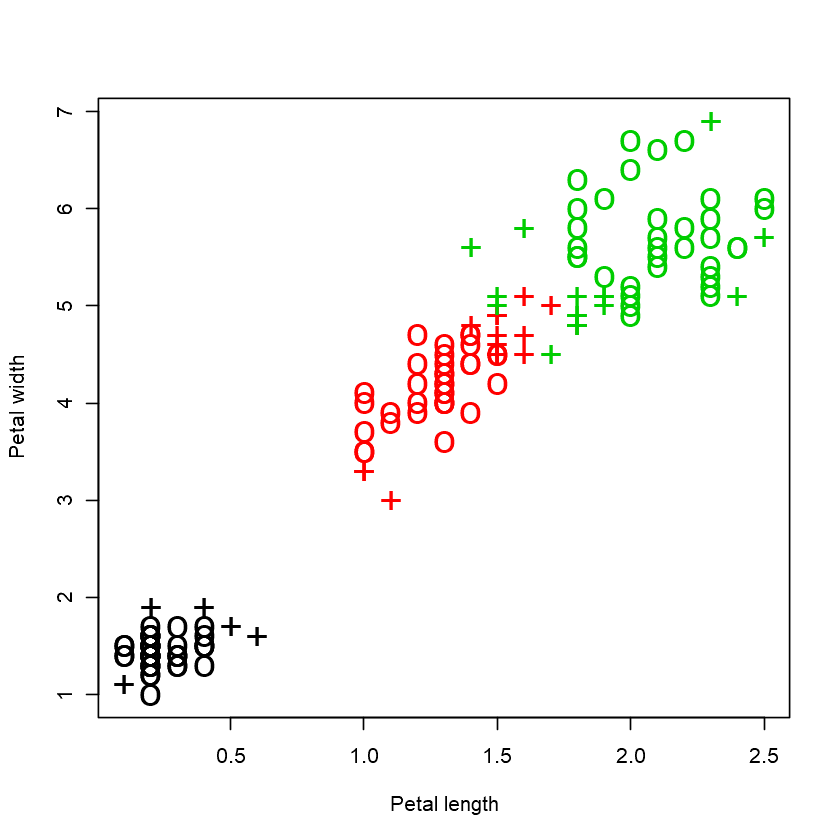

In [18]:
svm.model <- svm(Species ~ Petal.Width + Petal.Length, data = iris, kernel = "radial") # linear

# the + are support vectors
plot(iris$Petal.Width, iris$Petal.Length,
     col = as.integer(iris[, 5]), 
     pch = c("o","+")[1:nrow(iris) %in% svm.model$index + 1],
     cex = 2, 
     xlab = "Petal length", ylab = "Petal width")
#legend(x = 3.37, y=7.5, legend = c("Setosa", "versicolor", "verginica"),fill = c('blue','red','green'))

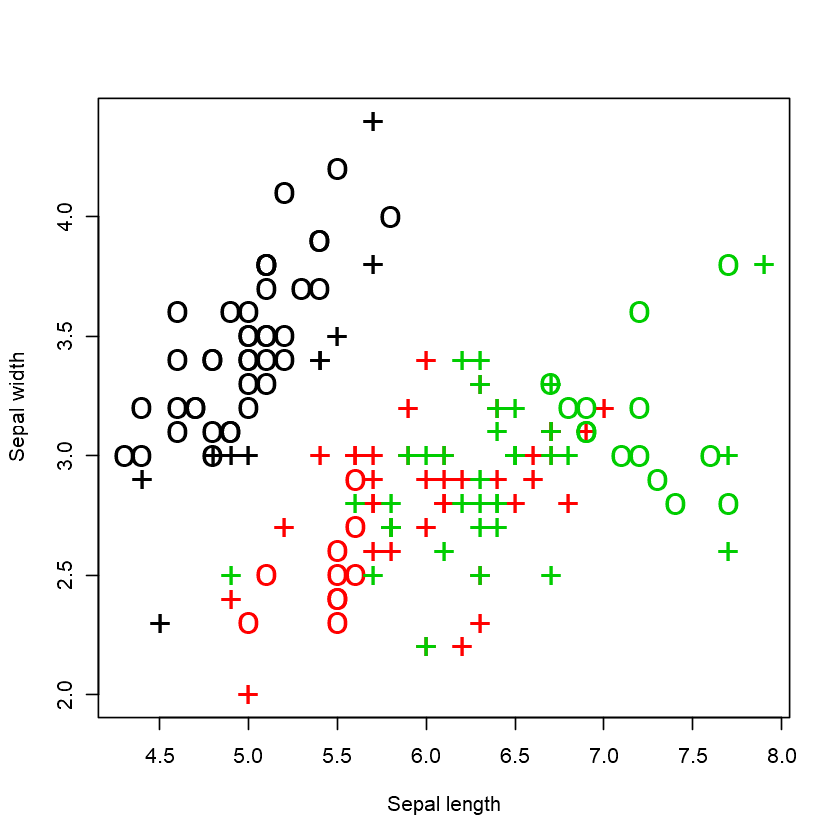

In [19]:
svm.model <- svm(Species ~ Sepal.Length + Sepal.Width, data = iris, kernel = "radial") # linear
# the + are support vectors
plot(iris$Sepal.Length, iris$Sepal.Width, col = as.integer(iris[, 5]), 
     pch = c("o","+")[1:150 %in% svm.model$index + 1], cex = 2, 
     xlab = "Sepal length", ylab = "Sepal width")

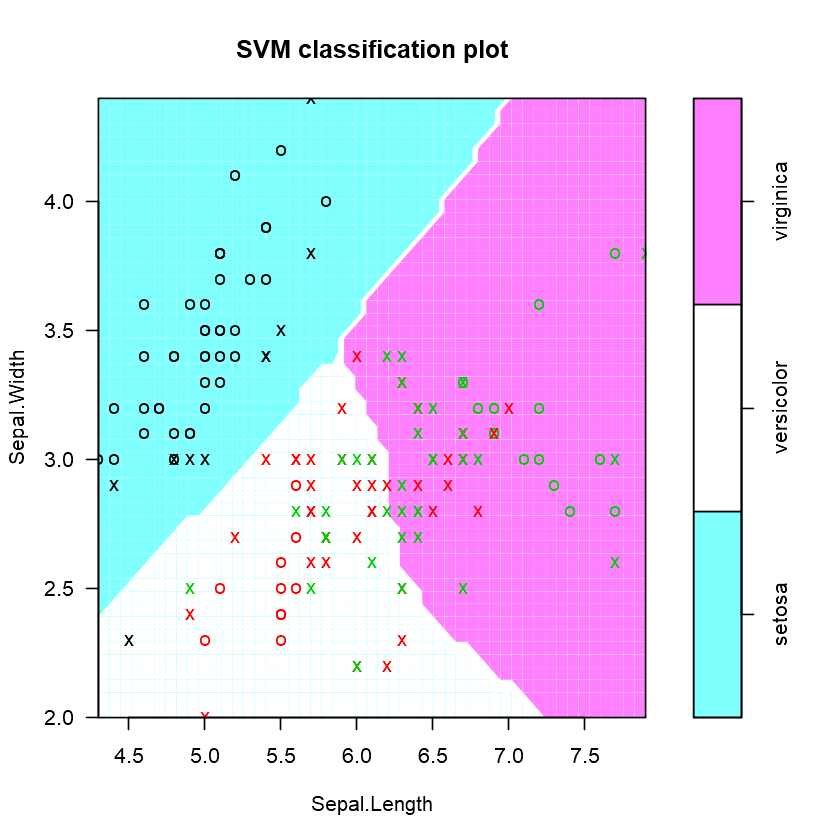

In [20]:
plot(svm.model, iris, Sepal.Width ~ Sepal.Length)

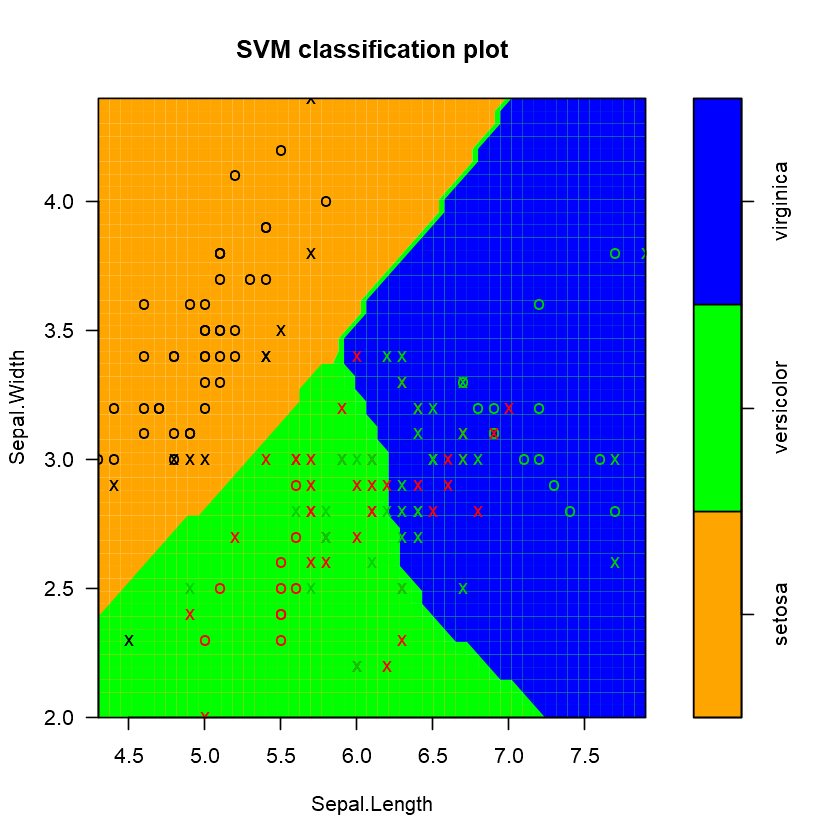

In [21]:
plot(svm.model, iris, Sepal.Width ~ Sepal.Length, 
      col = c("orange","green","blue")) # showing a 2D slice of the 4D space

Warning message:
"package 'ggplot2' was built under R version 3.5.3"

Loading required package: carData


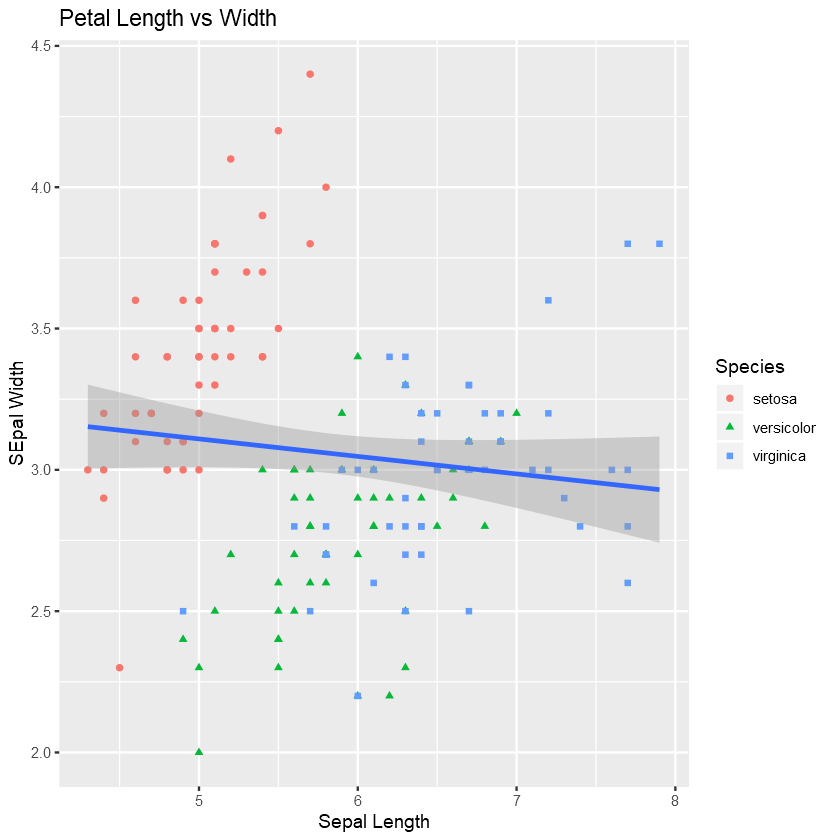

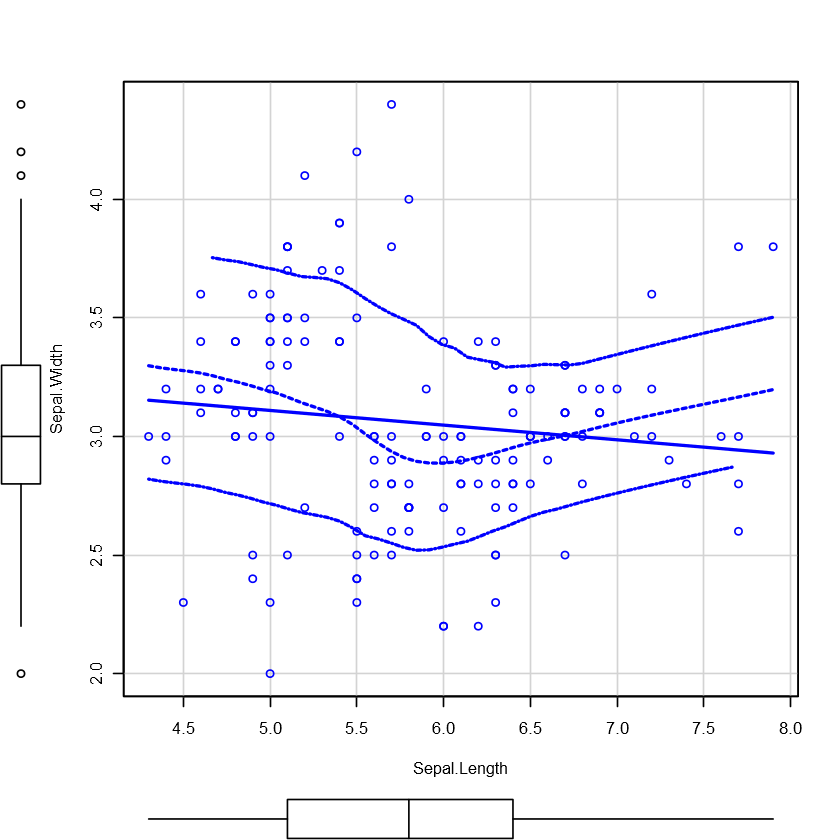

In [22]:
library("ggplot2")
ggplot(data = iris, aes(x =Sepal.Length, y = Sepal.Width))+
  xlab("Sepal Length")+
  ylab("SEpal Width") +
  geom_point(aes(color = Species,shape=Species))+
  geom_smooth(method='lm')+
  ggtitle("Petal Length vs Width")


library(car)
scatterplot(Sepal.Length,Sepal.Width)

In [23]:
#install.packages("ggplot2")

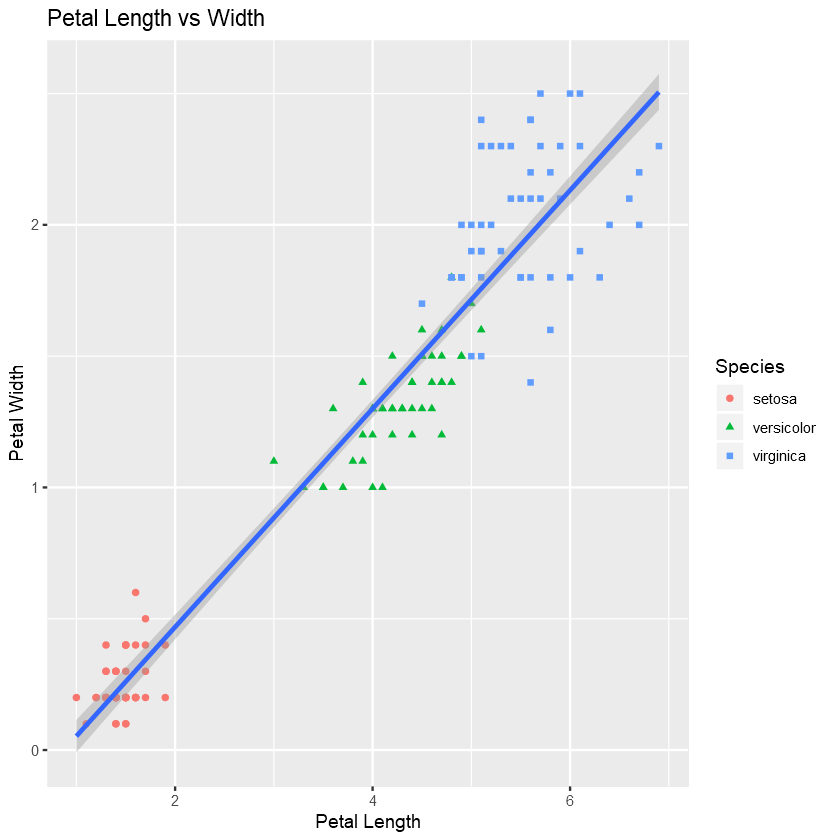

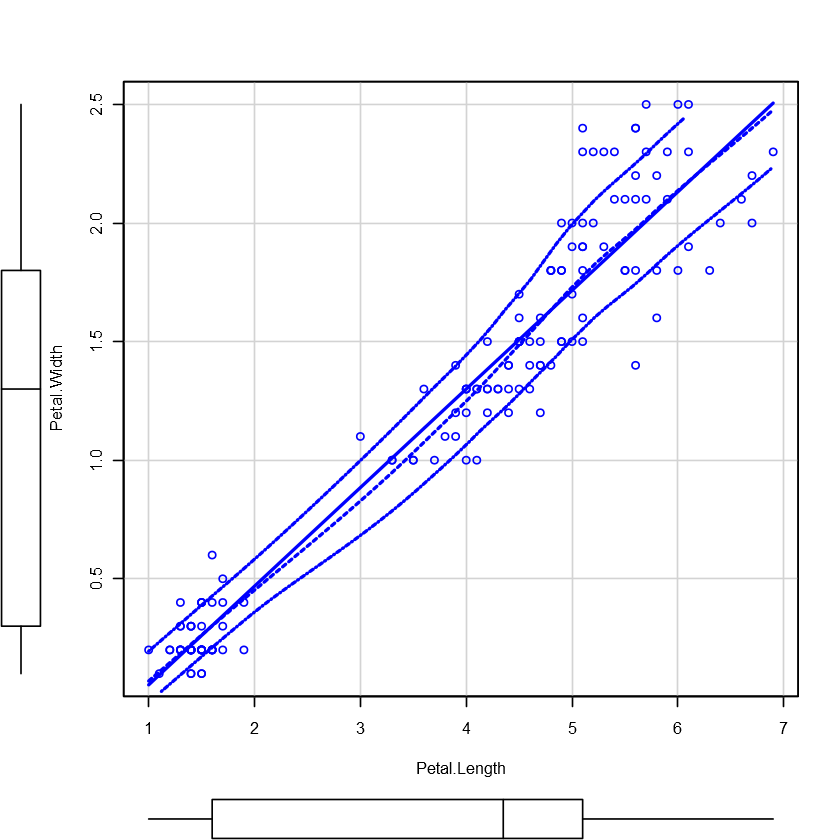

In [24]:

ggplot(data = iris, aes(x =Petal.Length, y = Petal.Width))+
  xlab("Petal Length")+
  ylab("Petal Width") +
  geom_point(aes(color = Species,shape=Species))+
  geom_smooth(method='lm')+
  ggtitle("Petal Length vs Width")


library(car)
scatterplot(Petal.Length,Petal.Width)

In [25]:
data <- read.csv("C:\\Users\\hp\\Downloads\\cerealspga05.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

print(str(data))

'data.frame':	74 obs. of  16 variables:
 $ name    : chr  "100%_Bran" "All-Bran" "All-Bran_with_Extra_Fiber" "Cracklin'_Oat_Bran" ...
 $ mfr     : chr  "N" "K" "K" "K" ...
 $ type    : chr  "C" "C" "C" "C" ...
 $ calories: int  70 70 50 110 120 120 120 110 110 110 ...
 $ protein : int  4 4 4 3 3 3 3 2 2 2 ...
 $ fat     : int  1 1 0 3 1 1 5 2 2 0 ...
 $ sodium  : int  130 260 140 140 200 210 15 200 180 125 ...
 $ fiber   : num  10 9 14 4 6 5 2 1 1.5 1 ...
 $ carbo   : num  5 7 8 10 11 14 8 14 10.5 11 ...
 $ sugars  : int  6 5 0 7 14 12 8 8 10 14 ...
 $ potass  : int  280 320 330 160 260 240 135 -1 70 30 ...
 $ vitamins: int  25 25 25 25 25 25 0 25 25 25 ...
 $ shelf   : int  3 3 3 3 3 2 3 3 1 2 ...
 $ weight  : num  1 1 1 1 1.33 1.33 1 1 1 1 ...
 $ cups    : num  0.33 0.33 0.5 0.5 0.67 0.75 1 0.75 0.75 1 ...
 $ rating  : num  68.4 59.4 93.7 40.4 37.8 ...
NULL


In [26]:
library("dplyr")
finaldf <- select(data, mfr,calories,sugars,sodium)
    
finaldf <- mutate(finaldf, mfrnum = ifelse(mfr == "N" ,0 ,
                                    ifelse(mfr == "Q",1 ,
                                    ifelse(mfr == "K",2 ,
                                    ifelse(mfr == "A",3 ,
                                    ifelse(mfr == "G",4 ,
                                    ifelse(mfr == "P",5 ,
                                    ifelse(mfr == "R" ,6 ,7
                                                  ))) ))) ))
                  
finaldf <- select(finaldf, mfrnum,calories,sugars,sodium)

head(finaldf)

Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following object is masked from 'package:car':

    recode

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



mfrnum,calories,sugars,sodium
0,70,6,130
2,70,5,260
2,50,0,140
2,110,7,140
5,120,14,200
2,120,12,210


In [27]:
str(finaldf)

'data.frame':	74 obs. of  4 variables:
 $ mfrnum  : num  0 2 2 2 5 2 1 6 4 2 ...
 $ calories: int  70 70 50 110 120 120 120 110 110 110 ...
 $ sugars  : int  6 5 0 7 14 12 8 8 10 14 ...
 $ sodium  : int  130 260 140 140 200 210 15 200 180 125 ...


In [28]:
library(e1071)
finaldf$mfrnum = factor(finaldf$mfrnum)
head(finaldf)

mfrnum,calories,sugars,sodium
0,70,6,130
2,70,5,260
2,50,0,140
2,110,7,140
5,120,14,200
2,120,12,210


In [29]:
str(finaldf)

'data.frame':	74 obs. of  4 variables:
 $ mfrnum  : Factor w/ 7 levels "0","1","2","3",..: 1 3 3 3 6 3 2 7 5 3 ...
 $ calories: int  70 70 50 110 120 120 120 110 110 110 ...
 $ sugars  : int  6 5 0 7 14 12 8 8 10 14 ...
 $ sodium  : int  130 260 140 140 200 210 15 200 180 125 ...


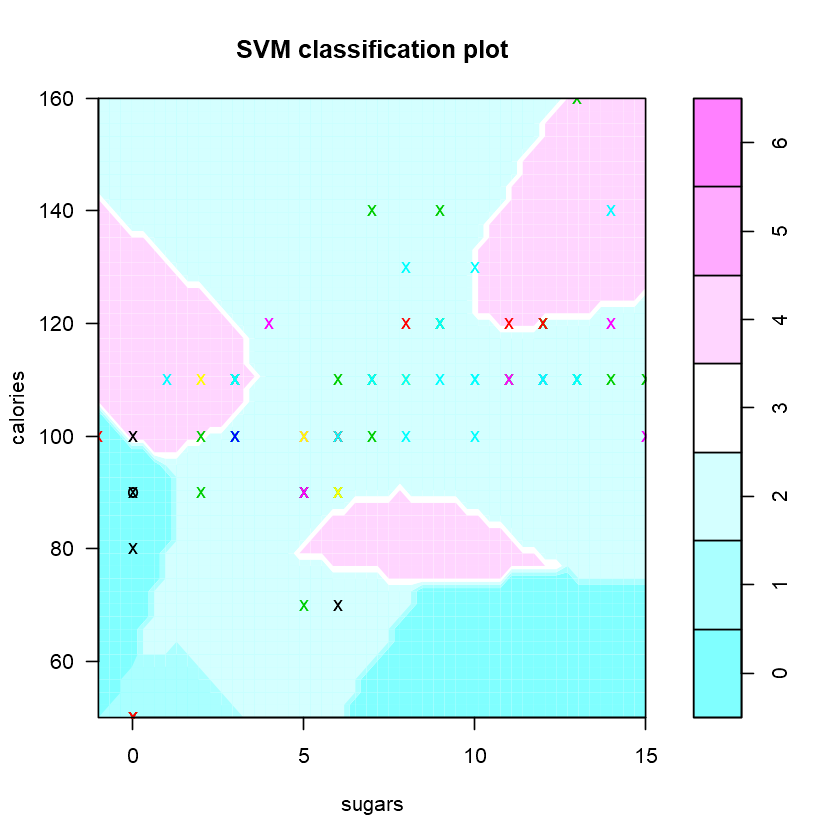

In [30]:
finaldf = finaldf[, c(2,3,1)]
# iris.part = iris.part[, c(3,4,5)]
fit = svm(mfrnum ~ ., data=finaldf, 
          type='C-classification', kernel='poly')
plot(fit, finaldf)
     
     # sigmoid  , linear', radial, poly

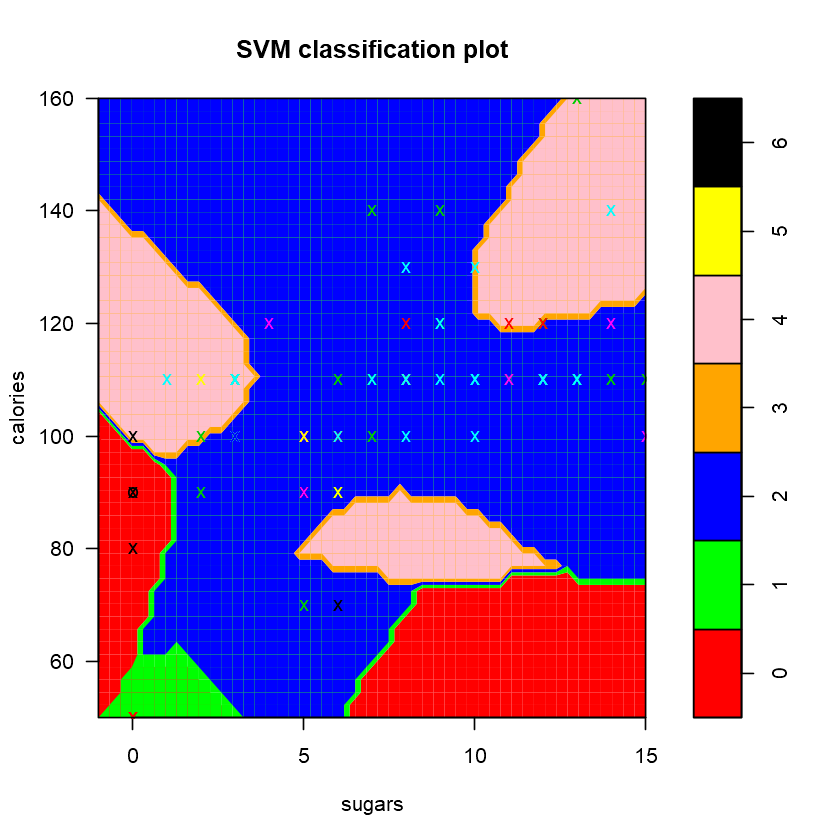

In [31]:
## plot with custom symbols and colors
plot(fit, finaldf,  
     col = c("red","green","blue","orange","pink","yellow","black"))

mfr == "N" ,0 ,
mfr == "Q",1 ,
mfr == "K",2 ,
mfr == "A",3 ,
mfr == "G",4 ,
mfr == "P",5 ,
mfr == "R" ,6

In [32]:
# K  -2
# G - 4
# P = 5

# N - 0


In [33]:
fd <- finaldf
head(fd)


calories,sugars,mfrnum
70,6,0
70,5,2
50,0,2
110,7,2
120,14,5
120,12,2


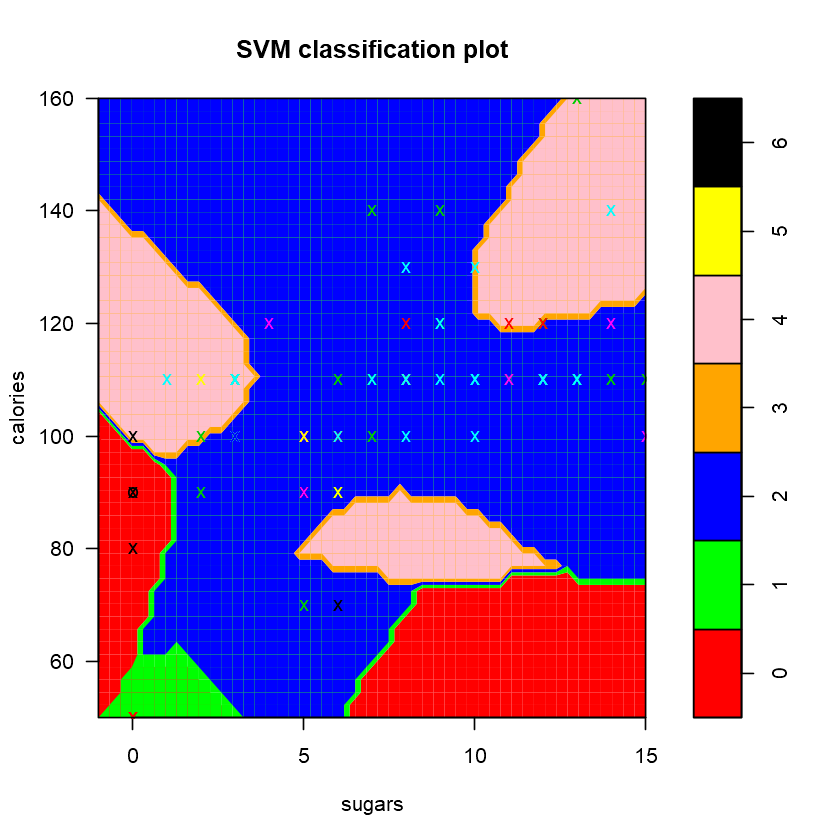

In [37]:
fd2 = fd[, c(2,3,1)]
# iris.part = iris.part[, c(3,4,5)]
fit = svm(mfrnum ~ ., data=fd2, 
          type='C-classification', kernel='poly')
#plot(fit, finaldf)
plot(fit, fd2, calories ~ sugars ,
    #color.palette =   topo.colors,
     col = c("red","green","blue","orange","pink","yellow","black")
     )
# col = c("red","green","blue","orange","pink","yellow","black")

# color.palette =  topo.colors  , heat.colors,  terrain.colors , cm.colors

In [ ]:
# SVM - Regresession

In [38]:
data <- read.csv("C:\\Users\\hp\\Downloads\\cerealspga05.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

print(str(data))
head(data)
library("dplyr")
finaldf <- select(data, mfr,calories,sugars,sodium,rating)

finaldf <- mutate(finaldf, mfrnum = ifelse(mfr == "N" ,0 ,
                                           ifelse(mfr == "Q",1 ,
                                                  ifelse(mfr == "K",2 ,
                                                         ifelse(mfr == "A",3 ,
                                                                ifelse(mfr == "G",4 ,
                                                                       ifelse(mfr == "P",5 ,
                                                                              ifelse(mfr == "R" ,6 ,7
                                                                              ))) ))) ))

finaldf <- select(finaldf, mfrnum,calories,sugars,sodium, rating)
head(finaldf)
library(e1071)
finaldf$mfrnum = factor(finaldf$mfrnum)
head(finaldf)


finaldf$rating <- as.integer(finaldf$rating)

fit <- svm(rating ~ ., data=finaldf, 
           type='C-classification', kernel='linear')

'data.frame':	74 obs. of  16 variables:
 $ name    : chr  "100%_Bran" "All-Bran" "All-Bran_with_Extra_Fiber" "Cracklin'_Oat_Bran" ...
 $ mfr     : chr  "N" "K" "K" "K" ...
 $ type    : chr  "C" "C" "C" "C" ...
 $ calories: int  70 70 50 110 120 120 120 110 110 110 ...
 $ protein : int  4 4 4 3 3 3 3 2 2 2 ...
 $ fat     : int  1 1 0 3 1 1 5 2 2 0 ...
 $ sodium  : int  130 260 140 140 200 210 15 200 180 125 ...
 $ fiber   : num  10 9 14 4 6 5 2 1 1.5 1 ...
 $ carbo   : num  5 7 8 10 11 14 8 14 10.5 11 ...
 $ sugars  : int  6 5 0 7 14 12 8 8 10 14 ...
 $ potass  : int  280 320 330 160 260 240 135 -1 70 30 ...
 $ vitamins: int  25 25 25 25 25 25 0 25 25 25 ...
 $ shelf   : int  3 3 3 3 3 2 3 3 1 2 ...
 $ weight  : num  1 1 1 1 1.33 1.33 1 1 1 1 ...
 $ cups    : num  0.33 0.33 0.5 0.5 0.67 0.75 1 0.75 0.75 1 ...
 $ rating  : num  68.4 59.4 93.7 40.4 37.8 ...
NULL


name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1.00,0.33,68.40297
All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1.00,0.33,59.42551
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1.00,0.50,93.70491
Cracklin'_Oat_Bran,K,C,110,3,3,140,4,10,7,160,25,3,1.00,0.50,40.44877
Post_Nat._Raisin_Bran,P,C,120,3,1,200,6,11,14,260,25,3,1.33,0.67,37.84059
Raisin_Bran,K,C,120,3,1,210,5,14,12,240,25,2,1.33,0.75,39.25920


mfrnum,calories,sugars,sodium,rating
0,70,6,130,68.40297
2,70,5,260,59.42551
2,50,0,140,93.70491
2,110,7,140,40.44877
5,120,14,200,37.84059
2,120,12,210,39.25920


mfrnum,calories,sugars,sodium,rating
0,70,6,130,68.40297
2,70,5,260,59.42551
2,50,0,140,93.70491
2,110,7,140,40.44877
5,120,14,200,37.84059
2,120,12,210,39.25920


In [39]:
summary(fit)


Call:
svm(formula = rating ~ ., data = finaldf, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.1 

Number of Support Vectors:  74

 ( 2 3 1 5 2 4 2 1 2 3 3 1 2 1 2 4 3 2 1 2 4 1 1 3 1 3 1 1 1 1 1 2 1 1 1 1 1 1 1 1 )


Number of Classes:  40 

Levels: 
 18 19 21 22 23 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 44 45 46 49 50 51 52 53 54 55 58 59 60 63 64 68 72 74 93




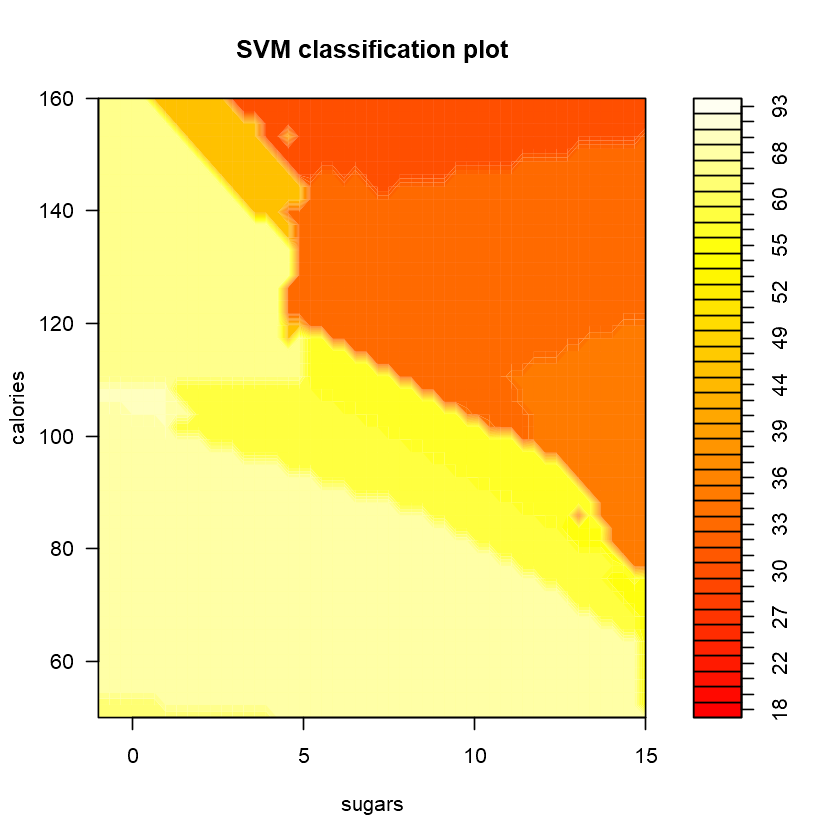

In [40]:
plot(fit, finaldf, calories ~ sugars,  
     color.palette =  heat.colors)

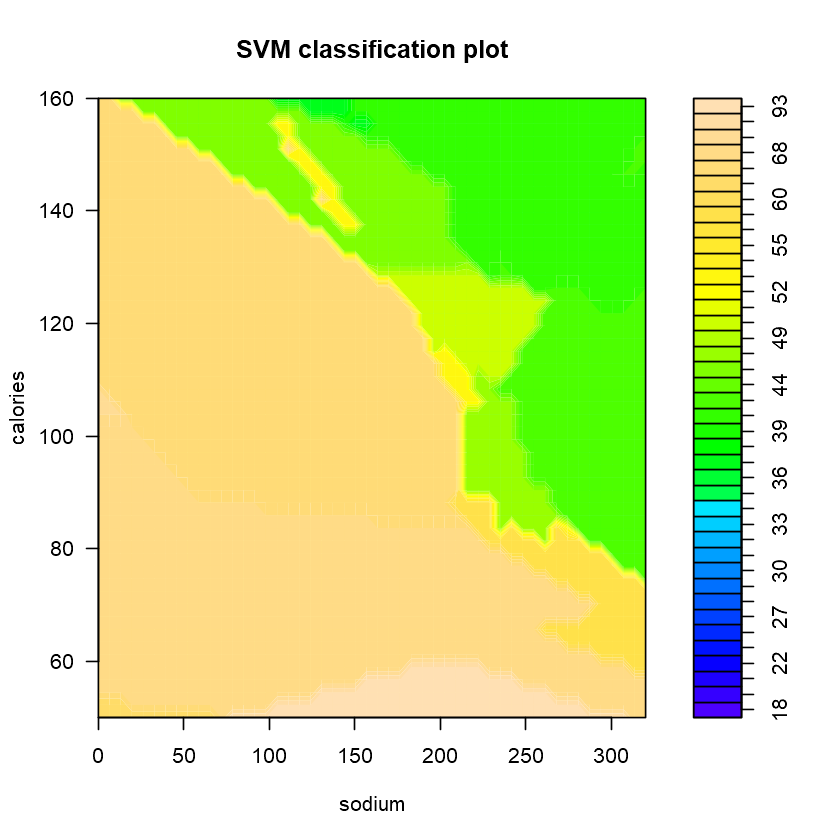

In [41]:
plot(fit, finaldf, calories ~ sodium ,
    color.palette =  topo.colors,
     )

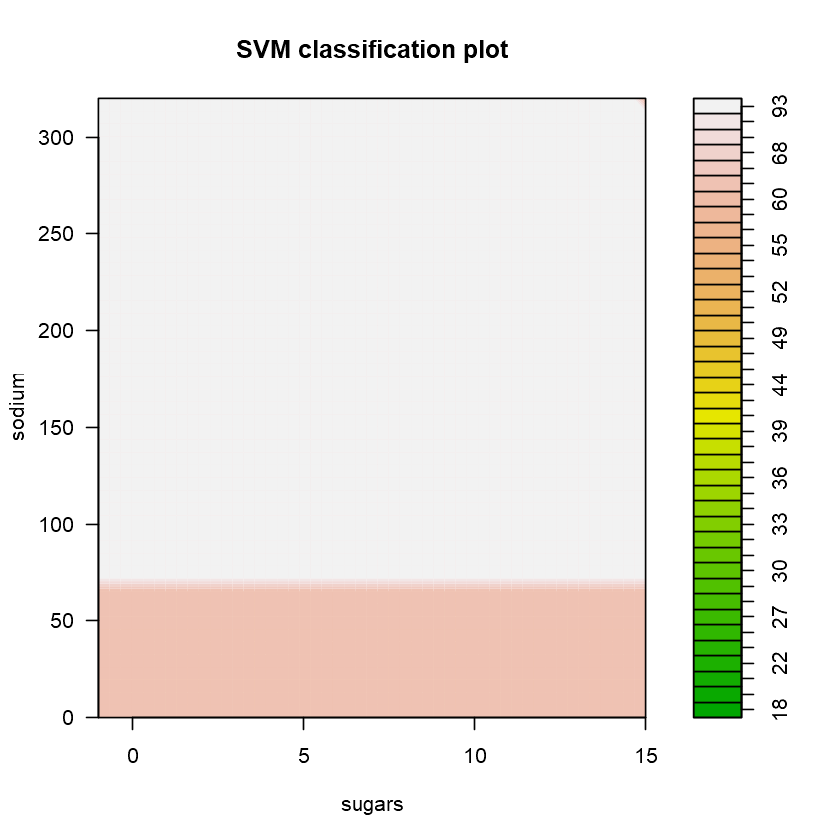

In [42]:
plot(fit, finaldf, sodium ~ sugars,  
     color.palette =  terrain.colors)

In [43]:

library(car)
library(RJSplot)

#scatter3d(finaldf$rating,finaldf$calories , finaldf$sodium)

Warning message:
"package 'RJSplot' was built under R version 3.5.3"

In [ ]:
#install.packages("RJSplot")

In [ ]:
#install.packages("rgl")